In [9]:
# Necessary Library Calls
import nibabel as nib
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.util import montage 
from skimage.transform import rotate
import torch
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.optim as optim
from tqdm import tqdm
from pylab import *
device = torch.device('cuda')
import gc

In [10]:
# Global variable definition
IMAGE_PATH = 'data/MICCAI_BraTS_2019_Data_Training'
CSV_FILE='data/MICCAI_BraTS_2019_Data_Training/new.csv'


In [11]:
def get_image(image_path,image_cat,image_id,image_type):
    t1_data=nib.load(os.path.join(image_path,image_cat,image_id,'')+image_id+'_t1.nii.gz').get_fdata()
    t1ce_data=nib.load(os.path.join(image_path,image_cat,image_id,'')+image_id+'_t1ce.nii.gz').get_fdata()
    t2_data=nib.load(os.path.join(image_path,image_cat,image_id,'')+image_id+'_t2.nii.gz').get_fdata()
    seg_data=nib.load(image_path+'/'+image_cat+'/'+image_id+'/'+image_id+'_seg.nii.gz').get_fdata()
    flair_data=nib.load(os.path.join(image_path,image_cat,image_id,'')+image_id+'_flair.nii.gz').get_fdata()
    result={'t1':t1_data,'t1ce':t1ce_data,'t2':t2_data,'seg':seg_data,'flair':flair_data}
   
    return result[image_type]; 

In [12]:
tumor_present=0
tumor_nonpresent=0

In [13]:
def tumor_slices_counter(image):
    p=0
    n=0
    for i in range (155):
        temp=image[:,:,i]
        if (1 in temp) or (2 in temp) or (4 in temp):
            p=p+1
        else:
            n=n+1
       
    return p,n

In [14]:
source = pd.read_csv(CSV_FILE)
print(len(source))

184


In [15]:
for i in range(len(source)):
    image_cat=source.iloc[i,0]
    image_id=source.iloc[i,1]
    mask = get_image(IMAGE_PATH,image_cat,image_id,'seg')
    temp = tumor_slices_counter(mask)
    tumor_present+=temp[0]
    tumor_nonpresent+=temp[1]

In [16]:
print("present: ", tumor_present)
print("missing: ", tumor_nonpresent)

present:  12074
missing:  16446


In [17]:
avg_p=tumor_present/184
avg_n=tumor_nonpresent/184

In [20]:
print(avg_p)
print(avg_n)

65.6195652173913
89.3804347826087


In [40]:
gc.collect()

2448

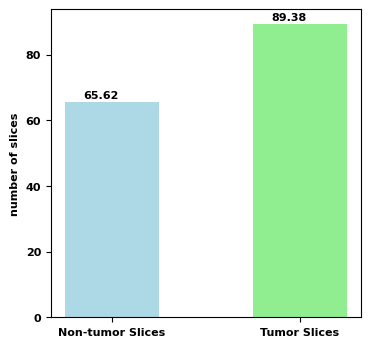

In [109]:
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
fig, ax = plt.subplots(figsize =(4, 4))
bars = ax.bar(('Non-tumor Slices','Tumor Slices'),(avg_p,avg_n),color=('lightblue','lightgreen'),width=0.5)
#ax.set_title("Average Tumor and Non-tumor Slice Numbers in BraTS 2019 Dataset")
ax.set_ylabel('number of slices')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x()+0.1, yval + 1, ("%.2f" % yval))

In [73]:
def class_counter(image):
    n=0
    et=0
    ed=0
    ncr=0
    for i in range (155):
        temp=image[:,:,i]
        for k in range (240):
            for j in range (240):
                if temp[k,j]== 1:
                    ncr=ncr+1
                elif temp[k,j]== 2:
                    ed+=1
                elif temp[k,j]==4:
                    et+=1
                else:
                    n+=1
    
    return n,ncr,ed,et,

In [75]:
n=0
ncr=0
ed=0
et=0

for i in range(len(source)):
    image_cat=source.iloc[i,0]
    image_id=source.iloc[i,1]
    mask = get_image(IMAGE_PATH,image_cat,image_id,'seg')
    temp = class_counter(mask)
    n+=temp[0]
    ncr+=temp[1]
    ed+=temp[2]
    et+=temp[3]

In [76]:
print(n)
print(ncr)
print(ed)
print(et)

1624380327
2648098
11014052
4709523


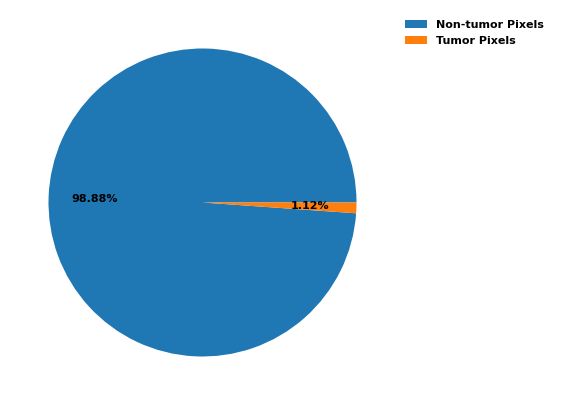

In [110]:
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 8})
plt.pie((n,(ncr+ed+et)), pctdistance = 0.7,autopct = '%.2f%%')
plt.legend(bbox_to_anchor=(1, 1),labels =("Non-tumor Pixels ","Tumor Pixels"), loc=2, frameon=False)
#plt.title("Distribution of Tumor and Non-tumor Pixels in BraTS 2019 Dataset")
plt.show() 